# Pattern Recognition Assignment I

# Problem Statement

Heart failure is a critical condition often caused by cardiovascular diseases (CVDs). Early
prediction of heart failure can aid in timely medical intervention and improve patient outcomes.
In this assignment, you will build classifiers to predict whether a patient is at risk of heart failure
based on clinical features. The data set for this task is the Heart Failure Prediction dataset
(918 samples, 11 features, 2 classes) available on Kaggle – it includes various patient attributes
(e.g. age, blood pressure, cholesterol levels, etc.) and a binary label indicating the occurrence
of heart failure. This assignment aims to familiarize you with several classical classification
methods and their performance on a real-world medical dataset. You will implement certain
algorithms from scratch and utilize library implementations for others. Through this process,
you will learn how different classifiers work, how to evaluate them, and how to analyze their
results.

## Data Preparation

### Import dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Read Dataset

In [2]:
df = pd.read_csv('./dataset.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Seperate the features and target class

In [3]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


### Categorical features encoding with `hot encoding`

- Get the categorical features

In [4]:
cat_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
X[cat_features].head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,0,Normal,N,Up
1,F,NAP,0,Normal,N,Flat
2,M,ATA,0,ST,N,Up
3,F,ASY,0,Normal,Y,Flat
4,M,NAP,0,Normal,N,Up


- **Hot Encoding**

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
encoder = OneHotEncoder(sparse_output=False)
x_encoded = encoder.fit_transform(X[cat_features])

# Convert to DataFrame
x_encoded_df = pd.DataFrame(x_encoded, columns=encoder.get_feature_names_out(cat_features), index=X.index)

# Drop original categorical columns and concatenate encoded data
new_X = pd.concat([X.drop(columns=cat_features), x_encoded_df], axis=1)

In [7]:
new_X.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,156,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,98,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,108,1.5,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,122,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


### Data Visualization

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

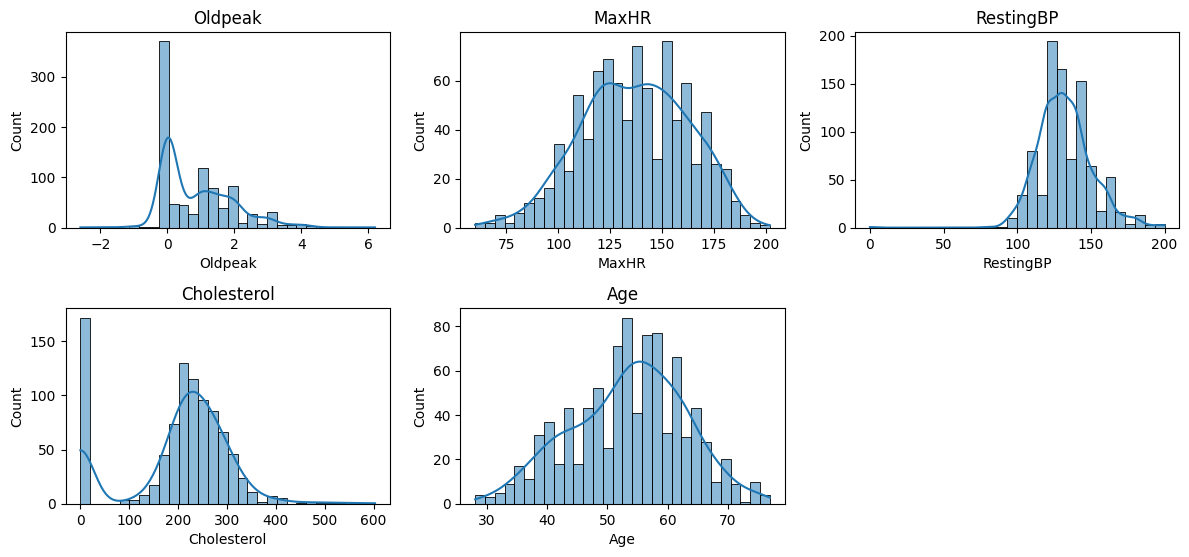

In [9]:
plt.figure(figsize=(12, 8))

for i, feature in enumerate(list(set(X.columns) - set(cat_features)), 1):
    plt.subplot(3, 3, i)
    sns.histplot(new_X[feature], kde=True, bins=30)
    plt.title(feature)

plt.tight_layout()
plt.show()

### Normalization

In [10]:
norm_features = ['Cholesterol', 'Oldpeak']

print(new_X[norm_features].mean())
normalized_X = new_X.copy()
normalized_X[norm_features] = (new_X[norm_features] - new_X[norm_features].mean()) / new_X[norm_features].std()

Cholesterol    198.799564
Oldpeak          0.887364
dtype: float64


- **Data After Normalization**

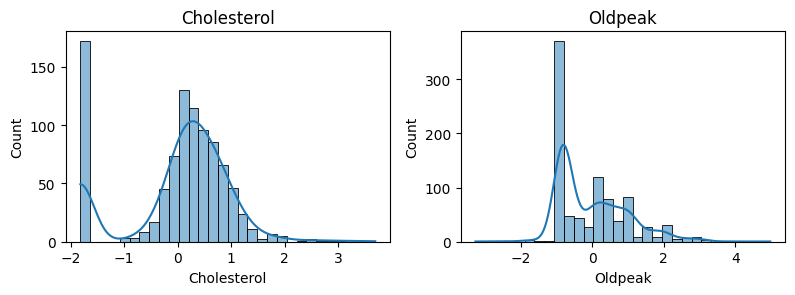

In [11]:
plt.figure(figsize=(12, 8))

for i, feature in enumerate(norm_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(normalized_X[feature], kde=True, bins=30)
    plt.title(feature)

plt.tight_layout()
plt.show()

In [12]:
final_X = new_X.copy()

### Split the data into Training, Validation and test sets

In [13]:
# Split the data into 70% training
x_train, x_temp, y_train, y_temp = train_test_split(final_X, y, test_size=0.3, stratify=y, random_state=42)

# Split the rest 30% into 10% validation and 20% test
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=2/3, stratify=y_temp, random_state=42)

In [14]:
x_train.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
335,62,120,0,134,-0.8,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
368,57,140,0,120,2.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
111,57,150,255,92,3.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
336,72,160,0,114,1.6,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
479,56,170,0,123,2.5,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [15]:
x_val.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
475,59,178,0,120,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
316,57,105,0,148,0.3,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
798,42,102,265,122,0.6,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
234,54,140,309,140,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
21,44,120,184,142,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [16]:
x_test.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
652,59,160,273,125,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
117,59,130,338,130,1.5,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
800,43,130,315,162,1.9,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
274,45,180,295,180,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
669,45,130,234,175,0.6,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
